<a href="https://colab.research.google.com/github/kudupuditejasree/week2/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tejasreekudupudi","key":"15e8d92a6d692f802b823c4ba41bfa40"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset

Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 822MB/s]


In [7]:
!unzip trash-type-image-dataset.zip -d trash_images

Archive:  trash-type-image-dataset.zip
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_009.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_010.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_011.jpg  
  inflating: trash_images/TrashType_Image_Dataset/cardboard/cardboard_012.jpg  
 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr

In [ ]:
import zipfile
import os

zip_path = '/content/trash-type-image-dataset.zip'
extract_path = '/content/trash_images'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os
for root, dirs, files in os.walk(extract_path):
    print(root, "contains", len(files), "files")
    break  # Just print the top level

/content/trash_images contains 0 files


In [ ]:
import os
for root, dirs, files in os.walk('/content/trash_images'):
    print(f"Directory: {root}")
    print(f"Contains {len(files)} files")
    print(f"Files: {files}")

Directory: /content/trash_images
Contains 0 files
Files: []
Directory: /content/trash_images/TrashType_Image_Dataset
Contains 0 files
Files: []
Directory: /content/trash_images/TrashType_Image_Dataset/cardboard
Contains 403 files
Files: ['cardboard_007.jpg', 'cardboard_358.jpg', 'cardboard_389.jpg', 'cardboard_008.jpg', 'cardboard_379.jpg', 'cardboard_045.jpg', 'cardboard_093.jpg', 'cardboard_353.jpg', 'cardboard_273.jpg', 'cardboard_239.jpg', 'cardboard_325.jpg', 'cardboard_274.jpg', 'cardboard_363.jpg', 'cardboard_003.jpg', 'cardboard_386.jpg', 'cardboard_204.jpg', 'cardboard_015.jpg', 'cardboard_374.jpg', 'cardboard_213.jpg', 'cardboard_362.jpg', 'cardboard_211.jpg', 'cardboard_023.jpg', 'cardboard_070.jpg', 'cardboard_129.jpg', 'cardboard_035.jpg', 'cardboard_189.jpg', 'cardboard_320.jpg', 'cardboard_298.jpg', 'cardboard_127.jpg', 'cardboard_308.jpg', 'cardboard_112.jpg', 'cardboard_121.jpg', 'cardboard_370.jpg', 'cardboard_110.jpg', 'cardboard_049.jpg', 'cardboard_270.jpg', 'cardb

In [ ]:
import shutil
src_dir = '/content/trash_images'
for root, dirs, files in os.walk(src_dir):
    for file in files:
        src_file = os.path.join(root, file)
        dst_file = os.path.join(src_dir, file)
        shutil.move(src_file, dst_file)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/trash-type-image-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/trash_images')

In [ ]:
import os
import shutil

src_dir = '/content/trash_images/TrashType_Image_Dataset'
dst_dir = '/content/dataset'

# Create destination folders for each class
classes = os.listdir(src_dir)
for cls in classes:
    os.makedirs(os.path.join(dst_dir, cls), exist_ok=True)

# Move images to the appropriate folders
for cls in classes:
    class_path = os.path.join(src_dir, cls)
    for file in os.listdir(class_path):
        src_file = os.path.join(class_path, file)
        dst_file = os.path.join(dst_dir, cls, file)
        shutil.move(src_file, dst_file)


In [ ]:
import os
for cls in os.listdir(dst_dir):
    print(cls, "->", len(os.listdir(os.path.join(dst_dir, cls))), "images")


glass -> 501 images
trash -> 137 images
metal -> 410 images
plastic -> 482 images
cardboard -> 403 images
paper -> 594 images


In [ ]:
import os

print("Contents of 'trash_images':")
print(os.listdir("trash_images"))


Contents of 'trash_images':
['metal_296.jpg', 'plastic_397.jpg', 'metal_118.jpg', 'glass_292.jpg', 'glass_462.jpg', 'glass_103.jpg', 'plastic_353.jpg', 'plastic_176.jpg', 'glass_067.jpg', 'paper_254.jpg', 'paper_267.jpg', 'metal_356.jpg', 'metal_017.jpg', 'glass_114.jpg', 'plastic_327.jpg', 'glass_138.jpg', 'paper_465.jpg', 'trash_137.jpg', 'glass_379.jpg', 'trash_068.jpg', 'metal_223.jpg', 'glass_437.jpg', 'glass_355.jpg', 'metal_120.jpg', 'glass_105.jpg', 'cardboard_007.jpg', 'paper_239.jpg', 'cardboard_358.jpg', 'glass_293.jpg', 'cardboard_389.jpg', 'paper_255.jpg', 'plastic_297.jpg', 'paper_101.jpg', 'glass_297.jpg', 'glass_489.jpg', 'metal_021.jpg', 'cardboard_008.jpg', 'cardboard_379.jpg', 'glass_255.jpg', 'paper_211.jpg', 'cardboard_045.jpg', 'plastic_453.jpg', 'metal_016.jpg', 'plastic_179.jpg', 'paper_455.jpg', 'plastic_045.jpg', 'plastic_147.jpg', 'paper_248.jpg', 'glass_003.jpg', 'plastic_378.jpg', 'paper_225.jpg', 'glass_461.jpg', 'metal_131.jpg', 'glass_411.jpg', 'cardboar

In [ ]:
import os
import shutil

src_dir = "dataset"  # or the correct folder with class folders inside
dst_dir = "trash_images"

classes = os.listdir(src_dir)

os.makedirs(dst_dir, exist_ok=True)

for cls in classes:
    class_path = os.path.join(src_dir, cls)
    if os.path.isdir(class_path):
        dst_class_path = os.path.join(dst_dir, cls)
        os.makedirs(dst_class_path, exist_ok=True)
        for file in os.listdir(class_path):
            src_file = os.path.join(class_path, file)
            dst_file = os.path.join(dst_class_path, file)
            shutil.copy(src_file, dst_file)


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

dataset_dir = "trash_images"
image_size = (124, 124)
batch_size = 32
seed = 42

train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)


Found 2527 files belonging to 7 classes.
Using 2022 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)
val_class= val_ds.class_names

Found 2527 files belonging to 7 classes.
Using 505 files for validation.


In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds)

test_ds = val_ds.take(val_batches // 2)

# Second half remains as the validation dataset
val_dat = val_ds.skip(val_batches // 2)

# Optimize test dataset by caching and prefetching to improve performance
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
print(train_ds.class_names)
print(val_class)
print(len(train_ds.class_names))

['TrashType_Image_Dataset', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['TrashType_Image_Dataset', 'cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
7


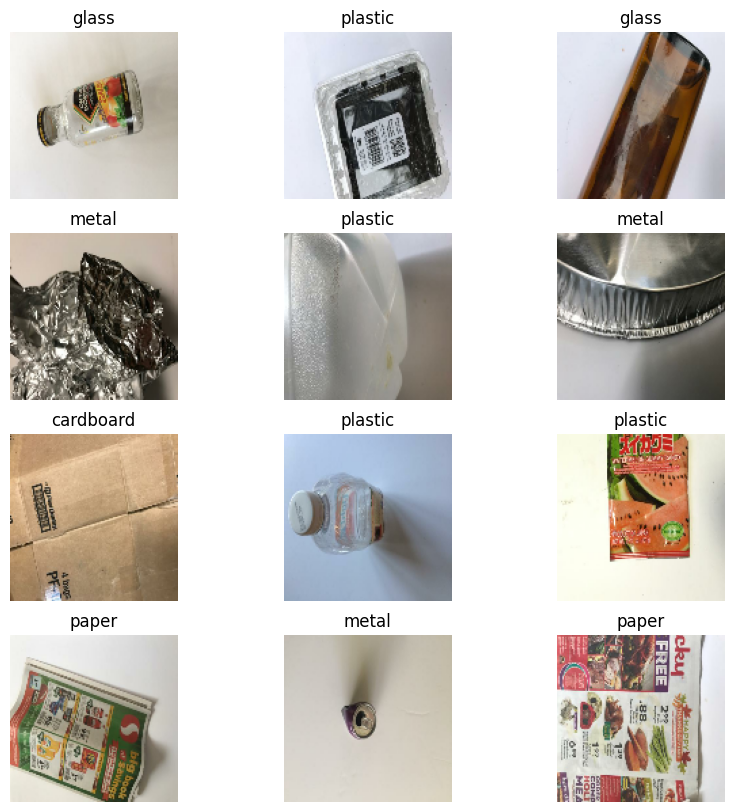

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
def count_distribution(dataset, class_names):
    total = 0
    counts = {name: 0 for name in class_names}

    for _, labels in dataset:
        for label in labels.numpy():
            class_name = class_names[label]
            counts[class_name] += 1
            total += 1

    for k in counts:
        counts[k] = round((counts[k] / total) * 100, 2)  # Convert to percentage
    return counts

In [ ]:
def simple_bar_plot(dist, title):
    plt.bar(dist.keys(), dist.values(), color='cornflowerblue')
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

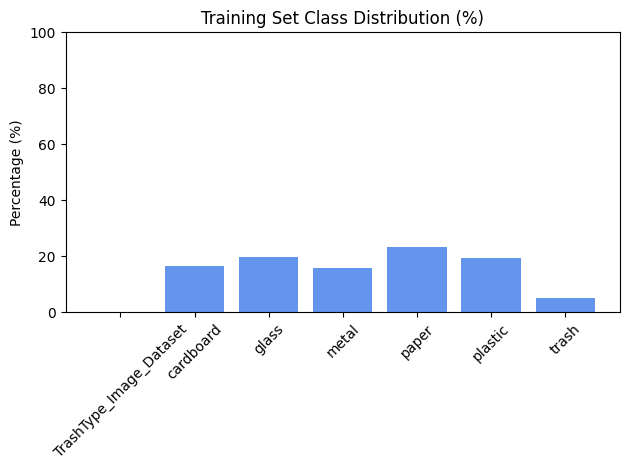

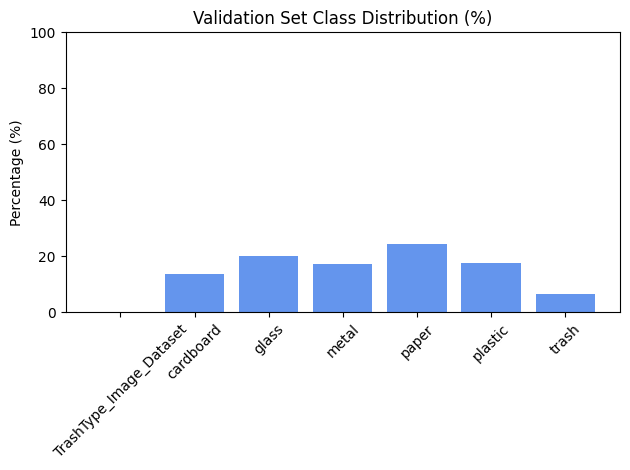

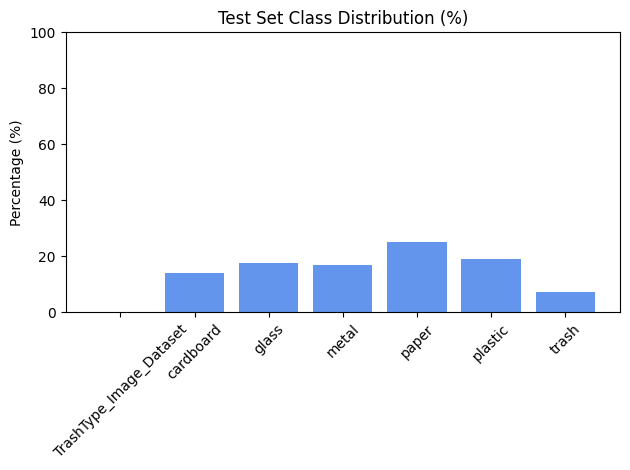

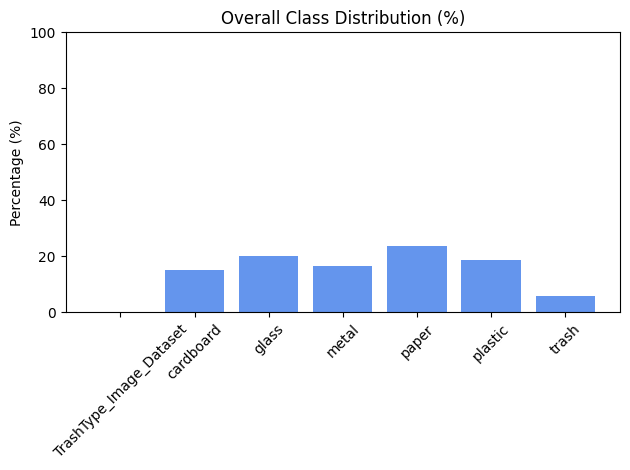

In [ ]:
# Show visualizations
simple_bar_plot(train_dist, "Training Set Class Distribution (%)")
simple_bar_plot(val_dist, "Validation Set Class Distribution (%)")
simple_bar_plot(test_dist, "Test Set Class Distribution (%)")
simple_bar_plot(overall_dist, "Overall Class Distribution (%)")

In [54]:
# Count class occurrences and prepare label list
class_counts = {i: 0 for i in range(len(class_names))}
all_labels = []

for images, labels in train_ds:
    for label in labels.numpy():
        class_counts[int(label)] += 1

        all_labels.append(int(label))


# Compute class weights (index aligned)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(len(class_names)),
    y=all_labels
)

# Create dictionary mapping class index to weight
class_weights = {i: w for i, w in enumerate(class_weights_array)}

In [55]:
print("Class Counts:", class_counts)
print("Class Weights:", class_weights)

Class Counts: {0: 2022}
Class Weights: {0: np.float64(1.0)}


In [56]:
#  Define data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


In [57]:
#  Load the pretrained MobileNetV3Small model (without the top classification layer)
base_model = EfficientNetV2B2(include_top=False, input_shape=(124, 124, 3),include_preprocessing=True, weights='imagenet')


#  Freeze early layers (to retain general pretrained features)
base_model.trainable = True
for layer in base_model.layers[:100]:  # You can adjust this number
    layer.trainable = False

In [58]:
#  Build the final model
model = Sequential([
    layers.Input(shape=(124, 124, 3)),
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # Change to your number of classes
])

In [59]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)

In [ ]:
# Set the number of epochs to train the model
epochs = 15  # Number of times the model will go through the entire dataset

# Train the model using the fit function
history = model.fit(
    train_ds,                # Training dataset used to adjust model weights
    validation_data=val_ds,   # Validation dataset to monitor performance on unseen data
    epochs=epochs,           # Number of training cycles, referencing the variable set earlier
    class_weight=class_weights,  # Handles class imbalances by assigning appropriate weights
    batch_size=32,           # Number of samples processed in each training step
    callbacks=[early]        # Implements early stopping to prevent unnecessary training
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - accuracy: 0.3718 - loss: 1.6025 - val_accuracy: 0.9921 - val_loss: 0.4485
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.9781 - loss: 0.3817 - val_accuracy: 1.0000 - val_loss: 0.0646
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 1.0000 - loss: 0.0508 - val_accuracy: 1.0000 - val_loss: 0.0206
Epoch 4/15
34/64 ━━━━━━━━━━━━━━━━━━━━ 1:12 2s/step - accuracy: 1.0000 - loss: 0.0215

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 124, 124, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b2 (Functional)  │ (None, 4, 4, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         8,454 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,727,114 (94.33 MB)

 Trainable params: 7,974,642 (30.42 MB)

 Non-trainable params: 803,186 (3.06 MB)

 Optimizer params: 15,949,286 (60.84 MB)

In [35]:
base_model.summary() # Print the architecture summary of the base model

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 124, 124,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 124, 124,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 124, 124,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 62, 62,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 62, 62,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 62, 62,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 62, 62,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 62, 62,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 62, 62,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 62, 62,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 62, 62,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 62, 62,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 62, 62,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 62, 62,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 31, 31,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 31, 31,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 31, 31,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 7,966,188 (30.39 MB)

 Non-trainable params: 803,186 (3.06 MB)

In [ ]:
acc = history.history['accuracy']          # Extract training accuracy from history
val_acc = history.history['val_accuracy']  # Extract validation accuracy from history
loss = history.history['loss']             # Extract training loss from history
val_loss = history.history['val_loss']     # Extract validation loss from history

epochs_range = range(len(acc))             # Define range for epochs based on accuracy length

plt.figure(figsize=(10,8))                 # Set overall figure size for visualization

plt.subplot(1,2,1)                         # Create first subplot (1 row, 2 columns, position 1)
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Place legend in lower-right corner
plt.title('Training vs Validation Accuracy') # Add title for accuracy plot

plt.subplot(1,2,2)                         # Create second subplot (1 row, 2 columns, position 2)
plt.plot(epochs_range, loss, label='Training Loss')         # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')   # Plot validation loss
plt.legend(loc='upper right')              # Place legend in upper-right corner
plt.title('Training vs Validation Loss')   # Add title for loss plot

plt.show()

In [42]:
from tensorflow.keras.utils import image_dataset_from_directory

dataset_dir = "trash_images"
image_size = (124, 124)
batch_size = 32
seed = 42

train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Final classes:", class_names)

Found 2527 files belonging to 1 classes.
Using 2022 files for training.
Final classes: ['TrashType_Image_Dataset']


In [43]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)
val_class= val_ds.class_names

Found 2527 files belonging to 1 classes.
Using 505 files for validation.


In [44]:
val_batches = tf.data.experimental.cardinality(val_ds)

test_ds = val_ds.take(val_batches // 2)

# Second half remains as the validation dataset
val_dat = val_ds.skip(val_batches // 2)

# Optimize test dataset by caching and prefetching to improve performance
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)

In [45]:
loss, accuracy = model.evaluate(test_ds_eval)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 732ms/step - accuracy: 1.0000 - loss: 4.2277e-04
Test accuracy is1.0000, Test loss is 0.0004


In [ ]:
# Extract true labels from all batches in the test dataset
y_true = np.concatenate([y.numpy() for x, y in test_ds_eval], axis=0)  # Convert Tensor labels to NumPy array and concatenate them

# Get predictions as probabilities from the model
y_pred_probs = model.predict(test_ds_eval)  # Predict class probabilities for each sample in the test dataset

# Convert probabilities to predicted class indices
y_pred = np.argmax(y_pred_probs, axis=1)  # Select the class with the highest probability for each sample

# Compute the confusion matrix to evaluate classification performance
cm = confusion_matrix(y_true, y_pred)  # Generate confusion matrix comparing true labels to predicted labels

# Print metrics to assess model performance
print(cm)  # Display confusion matrix
print(classification_report(y_true, y_pred))  # Print precision, recall, and F1-score for each class

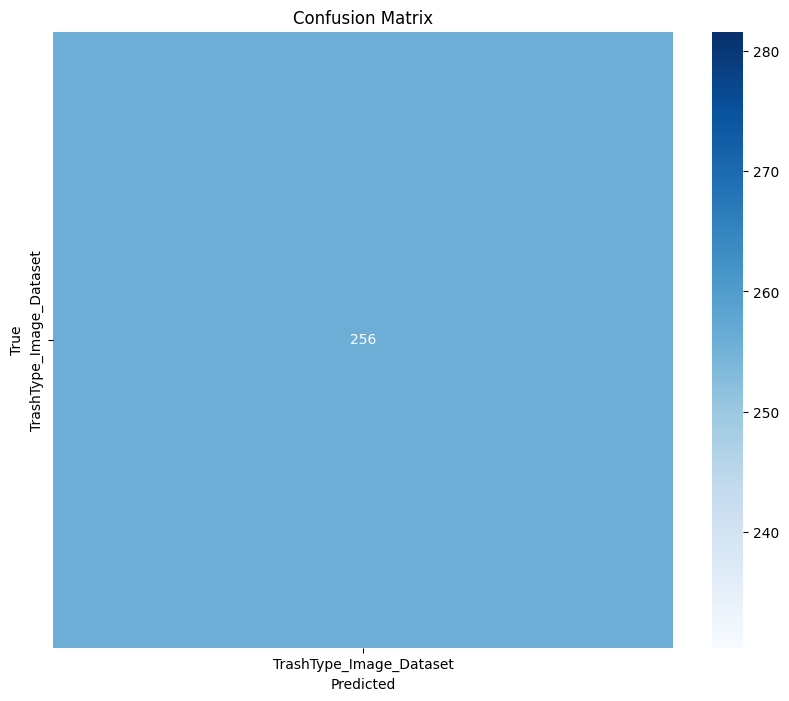

In [47]:
plt.figure(figsize=(10,8))  # Set figure size for better visualization

sns.heatmap(cm, annot=True, fmt='d',  # Create heatmap using confusion matrix
            xticklabels=class_names,  # Set class names for x-axis (predicted labels)
            yticklabels=class_names,  # Set class names for y-axis (true labels)
            cmap='Blues')  # Use a blue colormap for better contrast

plt.xlabel('Predicted')  # Label x-axis as Predicted classes
plt.ylabel('True')  # Label y-axis as True classes
plt.title('Confusion Matrix')  # Add title to the heatmap
plt.show()  # Display the plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


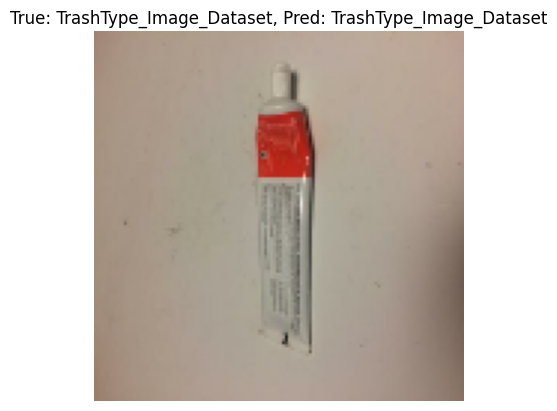

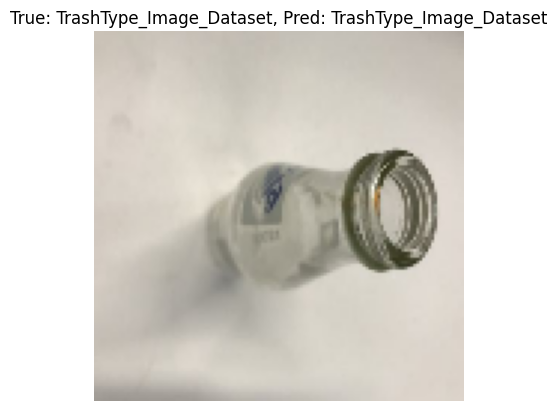

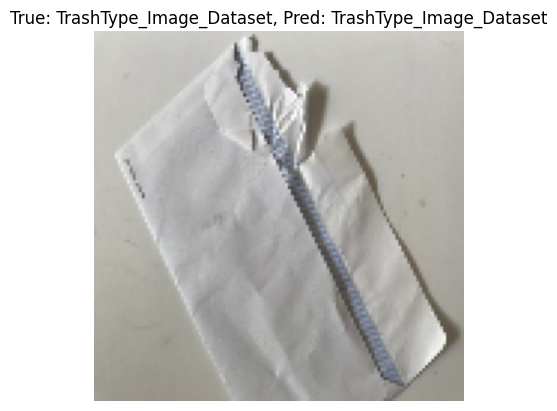

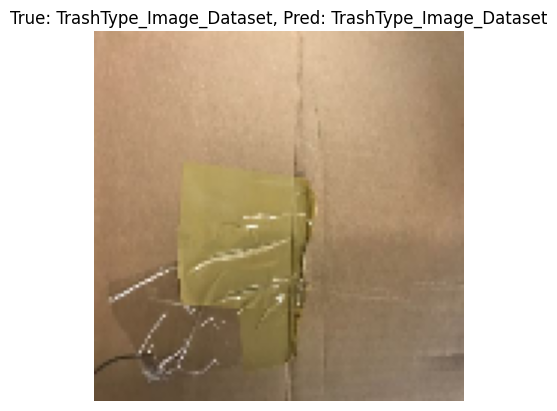

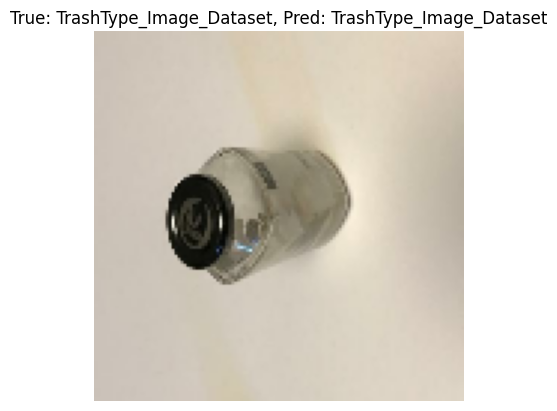

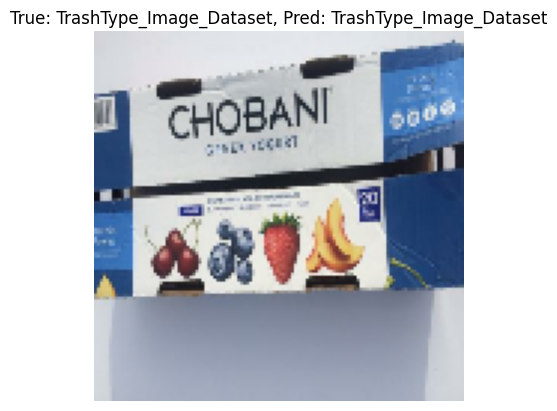

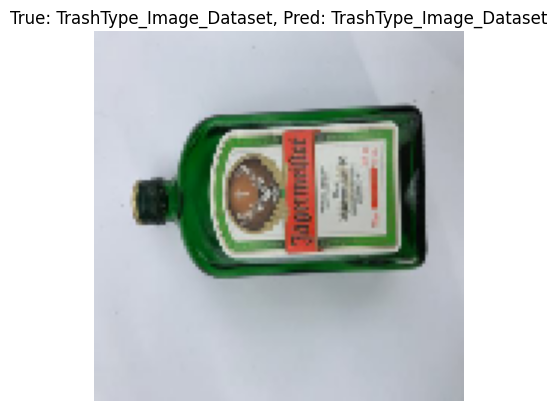

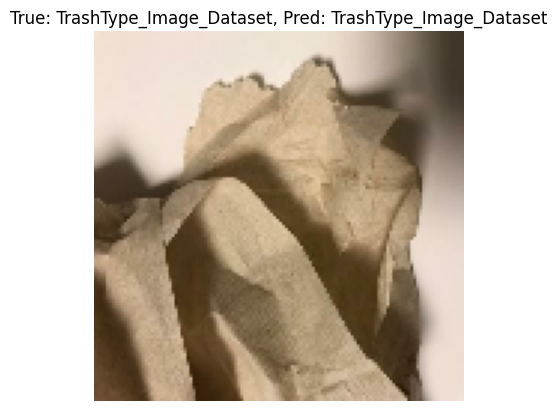

In [48]:
# Extract class names from the training dataset
class_names = train_ds.class_names

# Take one batch of images and labels from the test dataset for evaluation
for images, labels in test_ds_eval.take(1):

    # Generate predictions for the batch of images
    predictions = model.predict(images)

    # Get the predicted class index for each image
    pred_labels = tf.argmax(predictions, axis=1)

    # Loop through the first 8 images in the batch
    for i in range(8):
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert and display image
        plt.title(f"True: {class_names[labels[i]]}, Pred: {class_names[pred_labels[i]]}")  # Show actual and predicted class
        plt.axis("off")  # Hide axes for better visualization
        plt.show()  # Display the image with title

In [49]:
# Save model in Keras format with architecture, weights, and training configuration
model.save('Effiicientnetv2b2.keras')

# Load your Keras model
model = tf.keras.models.load_model('Effiicientnetv2b2.keras')

In [50]:
!pip install gradio

In [51]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

In [52]:
def classify_image(img):
    # Resize image to 124x124 pixels (Note: Comment says 128x128, but code resizes to 124x124)
    img = img.resize((124, 124))

    # Convert image to a NumPy array with float32 dtype
    img_array = np.array(img, dtype=np.float32)
    img_array = preprocess_input(img_array)

    # Expand dimensions to match model input shape (adds a batch dimension)
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction using the trained model
    prediction = model.predict(img_array)

    # Get the index of the highest predicted probability
    predicted_class_index = np.argmax(prediction)

    # Map the predicted index to its corresponding class name
    predicted_class_name = class_names[predicted_class_index]

    # Extract confidence score (probability of the predicted class)
    confidence = prediction[0][predicted_class_index]

    # Return formatted prediction result with confidence score
    return f"Predicted: {predicted_class_name} (Confidence: {confidence:.2f})"

In [53]:
iface = gr.Interface(
    fn=classify_image,  # Function to classify image using the trained model
    inputs=gr.Image(type="pil"),  # Accepts input as a PIL image
    outputs="text"  # Outputs prediction as text
)

# Launch the interface
iface.launch()  # Start the Gradio interface for user interaction

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fb982ee2edb2411b43.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
